In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('phishing_websites.csv')

# Separate features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Convert target values: -1 to 0 (legitimate) and 1 to 1 (phishing)
y = (y == 1).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Part 1: Decision Tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Print evaluation metrics for Decision Tree
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Get feature importances for Decision Tree
importances_dt = dt.feature_importances_
feature_importances_dt = pd.Series(importances_dt, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features for Decision Tree:")
print(feature_importances_dt.head(10))

Decision Tree Results:
[[ 820  136]
 [  38 1217]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.90       956
           1       0.90      0.97      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.93      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211


Top 10 features for Decision Tree:
SSLfinal_State       0.775773
URL_of_Anchor        0.135763
Links_in_tags        0.029856
web_traffic          0.029586
Request_URL          0.011071
Prefix_Suffix        0.010920
having_Sub_Domain    0.003360
Page_Rank            0.001563
Google_Index         0.001202
id                   0.000907
dtype: float64


In [6]:
# Part 2: Random Forest
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Print best parameters
print("\nBest parameters found: ", rf_random.best_params_)

# Use the best model to make predictions
y_pred_rf = rf_random.best_estimator_.predict(X_test)

# Print evaluation metrics for Random Forest
print("\nRandom Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Get feature importances for Random Forest
importances_rf = rf_random.best_estimator_.feature_importances_
feature_importances_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features for Random Forest:")
print(feature_importances_rf.head(10))


Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}

Random Forest Results:
[[ 904   52]
 [  26 1229]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


Top 10 features for Random Forest:
SSLfinal_State            0.288940
URL_of_Anchor             0.243414
web_traffic               0.066223
id                        0.060746
having_Sub_Domain         0.060668
Prefix_Suffix             0.043820
Links_in_tags             0.041269
Request_URL               0.020753
SFH                       0.019989
Links_pointing_to_page    0.016366
dtype: float64


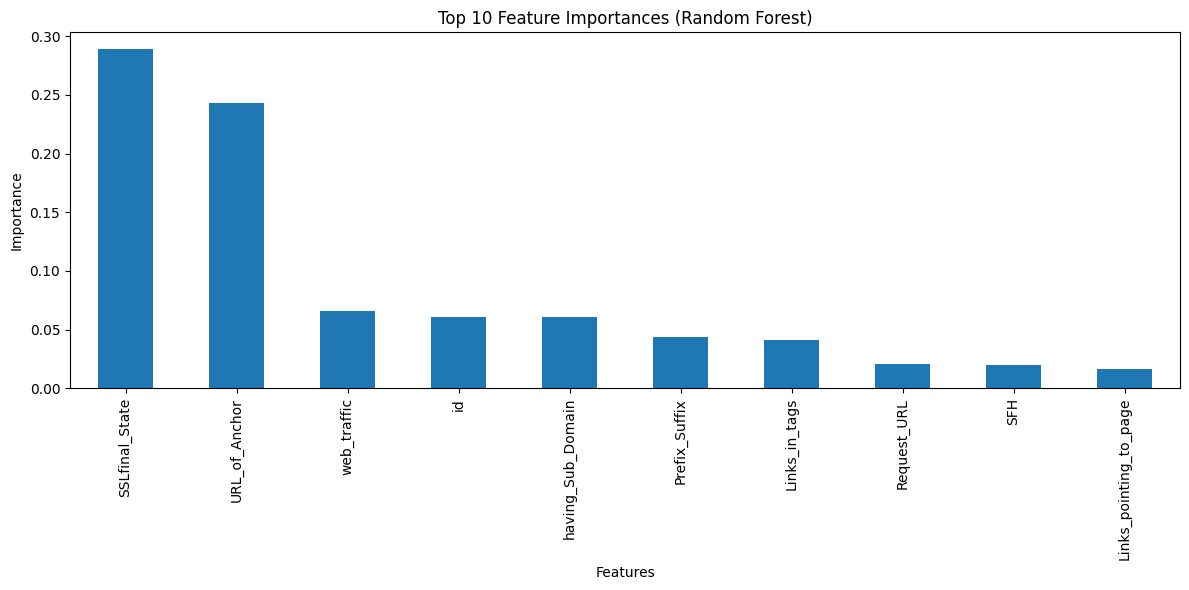

In [7]:
# Visualization of feature importances
plt.figure(figsize=(12, 6))
feature_importances_rf.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

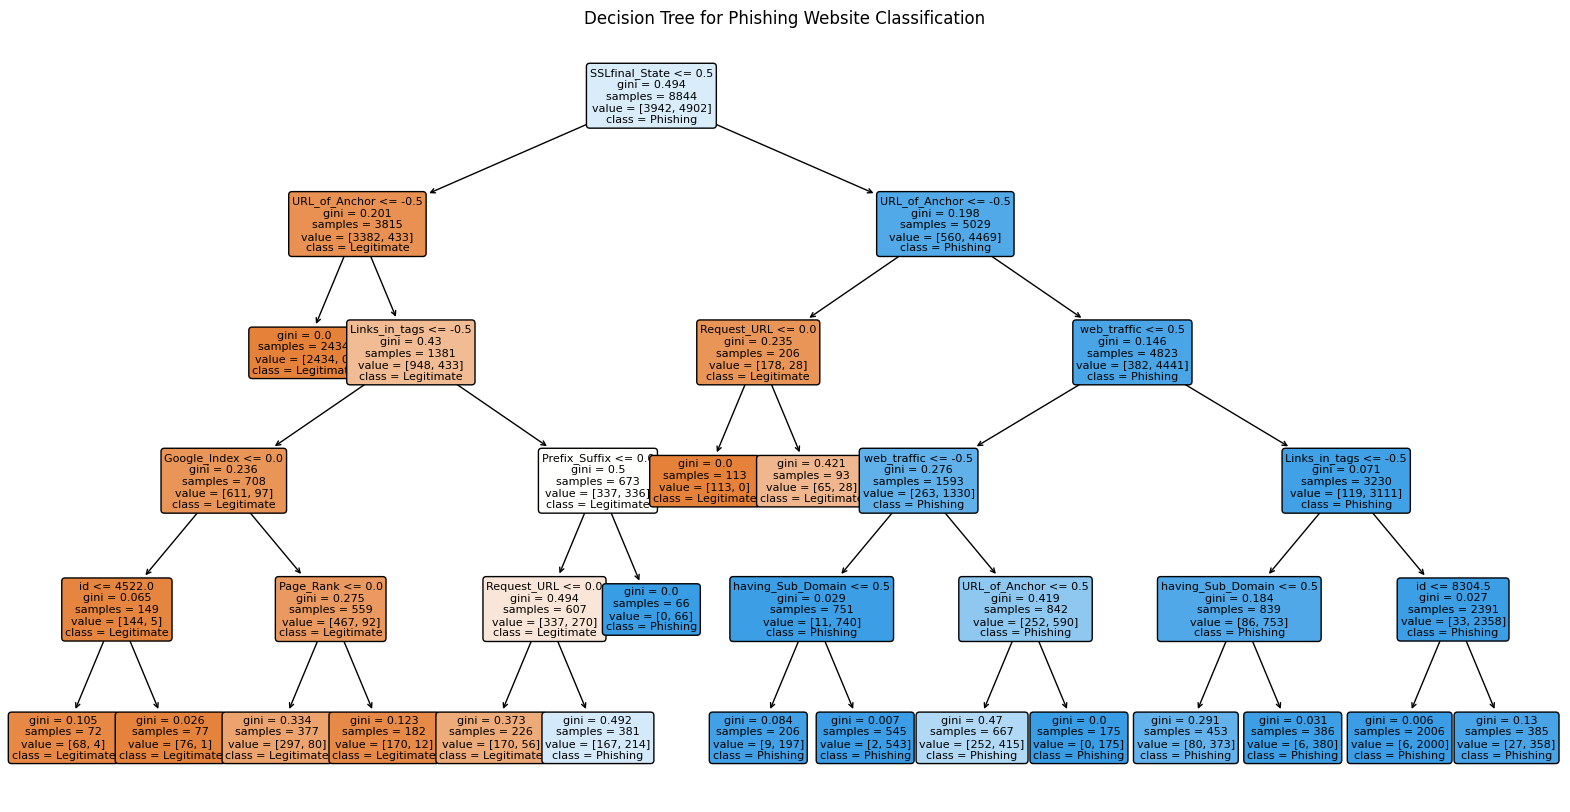

In [11]:
# Plot the decision tree
fig = plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns.tolist(), class_names=['Legitimate', 'Phishing'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Phishing Website Classification")
plt.show()

# Analyysi ja Johtopäätökset

## 1. Mallien Suorituskyvyn Vertailu
- Päätöspuun tarkkuus: [Decision Tree Accuracy] noin 92%
- Satunnaismetsän tarkkuus: [Random Forest Accuracy] noin 96%

## 2. Avainominaisuudet
Molemmat mallit tunnistavat SSLfinal_State:n ja URL_of_Anchor:n kriittisiksi ominaisuuksiksi.

## 3. Mallien Kompromissit
- Päätöspuu: Helpommin tulkittavissa, mutta vähemmän tarkka.
- Satunnaismetsä: Korkeampi tarkkuus, mutta vaikeampi tulkita.

## 4. Suositukset Toteutukseen
- Käytä Satunnaismetsä-mallia tietojenkalastelusivustojen tarkempaan havaitsemiseen.
- Keskity SSL-sertifikaatteihin ja URL-rakenteeseen käyttäjäkoulutusohjelmissa.
- Toteuta pisteytysjärjestelmä perustuen mallien tunnistamiin tärkeimpiin ominaisuuksiin.